<a href="https://colab.research.google.com/github/aditya161205/Data-DaVinci/blob/main/carpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
class LinearRegression:
  def __init__(self)->None:
    self.weights: np.ndarray | None=None
    self.bias: np.ndarray | None=None

  def predict(self,X:np.ndarray)->np.ndarray:
    y_pred=np.dot(self.weights,X.T) + self.bias
    return y_pred

  def __loss(self,X:np.ndarray,y:np.ndarray,norm:int)->tuple:

    y_pred=self.predict(X)
    n=X.shape[0]

    errors=np.abs(y_pred-y)**norm
    loss=np.sum(errors)/n

    gradient_base= norm*np.sign(y_pred-y)*(np.abs(y_pred-y)**(norm-1))
    dw = np.dot(X.T, gradient_base) / n
    db = np.sum(gradient_base) / n

    return loss, dw, db

  def fit(self,X:np.ndarray,y:np.ndarray,learning_rate:float=0.01,epochs:int=500,norm: int = 2, threshold: float = 0.0001)->None:

    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)

    n_features = X.shape[1]

    self.weights = np.zeros(n_features, dtype=np.float64)
    self.bias = 0.0
    prev_loss = float('inf')

    for epoch in range (epochs):
      curr_loss,dw,db=self.__loss(X, y, norm)
      self.weights-=learning_rate*dw
      self.bias-=learning_rate*db

      if abs(curr_loss-prev_loss)<threshold:
        print(f"Converged at epoch {epoch + 1}. Loss: {curr_loss:.4f}")
        break
      prev_loss=curr_loss




In [68]:
#using one hot encoding to convert all the data to numeric
df=pd.read_csv('linear_data.csv')
df_encoded=pd.get_dummies(df,columns = ['Manual Transmission', 'Fuel'], dtype = int, drop_first=True)

X=df_encoded.drop('Estimated Price',axis=1)
y=df_encoded['Estimated Price']
X.head()


,Original Price,Miles Driven,Mileage,Tank Size,HorsePower,Top Speed,Acceleration,Age,Manual Transmission_True,Fuel_Diesel,Fuel_EV,Fuel_Petrol
0,3864000,1263,54.685799,13.336164,596,180,8.172050,4,0,0,0,1
1,4288000,752,35.248357,19.057518,419,185,8.740271,3,1,0,0,1
2,2966000,4838,58.345711,28.361993,346,259,6.533210,5,1,1,0,0
3,3428000,3140,34.654196,24.024602,354,243,6.069808,4,1,1,0,0
4,2079000,4048,32.048424,17.980987,473,216,7.744648,2,0,1,0,0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [65]:
#Z-Score Standardization
#taking care of outliers
def z_score(X: np.ndarray) -> tuple:
    X = np.asarray(X, dtype=np.float64)
    x_mean = np.mean(X, axis=0)
    x_std = np.std(X, axis=0)
    x = (X - x_mean) / x_std
    return x, x_mean, x_std

In [62]:
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std


MSE loss:  4618293.044911691


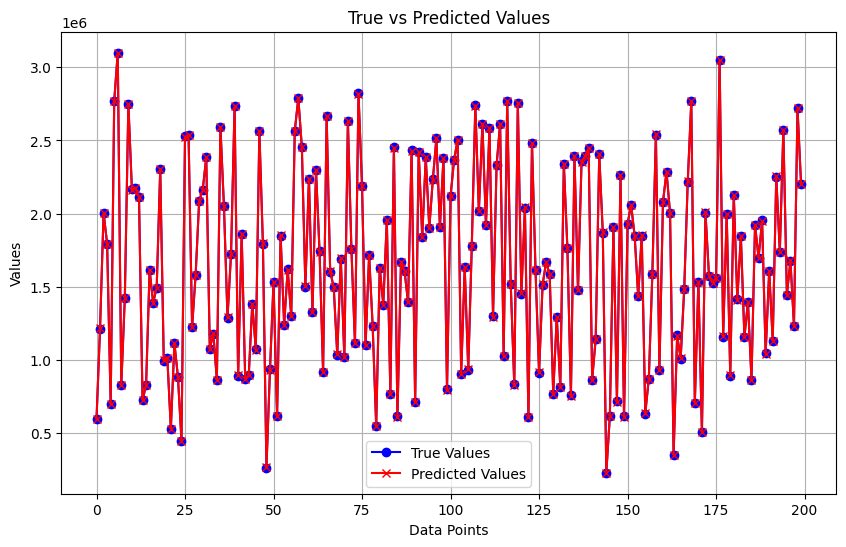

In [47]:
model = LinearRegression()
model.fit(x_train, y_train, epochs=500, learning_rate=0.01, norm=2, threshold=0.0001)
y_pred = model.predict(x_test)

print("MSE loss: ", np.mean((y_pred - y_test) ** 2))

indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))

plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()

In [70]:

new_car = np.array([[3750000, 2100, 50.2, 16.5, 420, 200, 7.5, 3, 1, 0, 0, 0]])


# 🟢 Apply Z-score normalization using the same mean & std from training
new_car_scaled = (new_car - x_mean) / x_std

predicted_price = model.predict(new_car_scaled)

print(f"Estimated Price: ${predicted_price[0]:,.2f}")



Estimated Price: $2,251,155.66
